In [9]:
import pymc3 as pm
import numpy as np

a, b = 1., 2.
data = b * (-np.log(np.random.uniform(100)))**(1 / a)
# Use iterable of distributions instead of array of random variables
with pm.Model() as weibull_2seg_2clust_withspike:
    gamma_alpha = pm.Uniform('gamma_alpha', lower=0.0, upper=30.0)
    gamma_beta = pm.Uniform('gamma_beta', lower=0.0, upper=30.0)
    shape1 = pm.HalfNormal('shape1', 1.)
    scale1 = pm.Gamma('scale1', alpha=gamma_alpha, beta=gamma_beta)
    shape2 = pm.HalfNormal('shape2', 1.)
    scale2 = pm.Gamma('scale2', alpha=gamma_alpha, beta=gamma_beta)

    #weibull1 = pm.Weibull('weibull1', alpha=shape1, beta=scale1)
    #weibull2 = pm.Weibull('weibull2', alpha=shape2, beta=scale2)
    #obs = pm.Normal('obs', mu=weibull1 + weibull2 , sd=10, observed=[1,2,3,4,5])

    weibull1 = pm.Weibull.dist(alpha=shape1, beta=scale1)
    weibull2 = pm.Weibull.dist(alpha=shape2, beta=scale2)

    w = pm.Dirichlet('w', a=np.array([1, 1]))
    obs = pm.Mixture('obs', w=w, comp_dists=[
                     weibull1, weibull2], observed=[1,2,3,4,5])

    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w_stickbreaking__, scale2_log__, shape2_log__, scale1_log__, shape1_log__, gamma_beta_interval__, gamma_alpha_interval__]
100%|██████████| 1500/1500 [00:07<00:00, 201.49it/s]


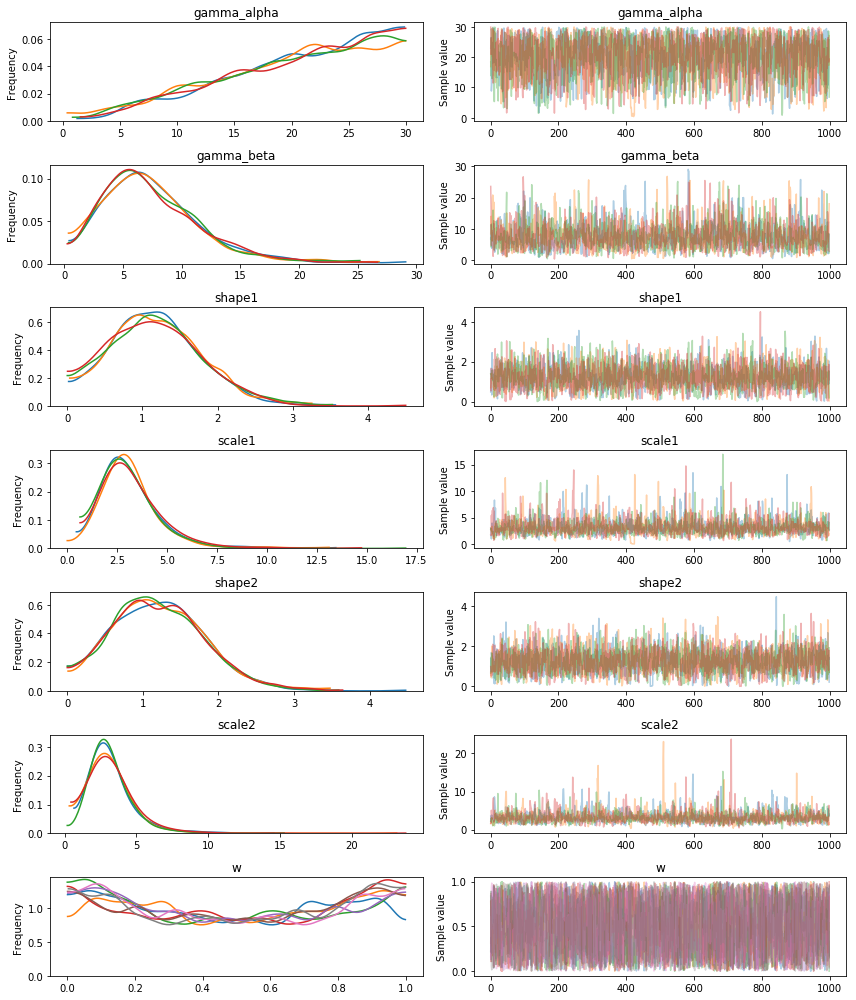

In [10]:
pm.traceplot(trace);